Package installation, loading the dataset, EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("anon_data.csv")
df.head()

,date,location_unique_id,state,count
0,2018-03-06,EBc7m85C8COpU/2u21il3j+aRkjQWBzQDGYxvvixQAc=,TN,23.0
1,2018-03-07,EBc7m85C8COpU/2u21il3j+aRkjQWBzQDGYxvvixQAc=,TN,22.0
2,2018-03-07,ChV6N8I9TPq0AJ3XT6b1XqNWzVjvN4hE+FVd2Z2dehc=,TN,29.0
3,2018-03-08,EBc7m85C8COpU/2u21il3j+aRkjQWBzQDGYxvvixQAc=,TN,30.0
4,2018-03-08,ChV6N8I9TPq0AJ3XT6b1XqNWzVjvN4hE+FVd2Z2dehc=,TN,31.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135452 entries, 0 to 135451
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                135452 non-null  object 
 1   location_unique_id  135452 non-null  object 
 2   state               135401 non-null  object 
 3   count               135451 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe()

,count
count,135451.000000
mean,30.383578
std,238.518501
min,1.000000
25%,17.000000
50%,26.000000
75%,37.000000
max,83990.000000


In [5]:
df['state'].value_counts()

,count
state,
TX,13940
OH,8388
GA,8323
IN,7720
KY,5935
FL,5831
IL,5705
TN,5490
SC,5107


In [6]:
df[df['state'].isna() == True].location_unique_id.unique()

array(['u9GHKdk/GCAqZAibfi91S86lkp/TH+UwedYHImEMsko=',
       'PX+2zOlcePm5U+KQyr05lMlaGS/eMovCobHDimSNXtQ=',
       '6oxNBolqeu2O9eEZsvI2ZjXkJkr/5z2'], dtype=object)

In [7]:
df.state.replace('Arizona', 'AZ', inplace=True)
df.state.replace('Arazona', 'AZ', inplace=True)
df.state.replace('California', 'CA', inplace=True)
df.state.replace('Texas', 'TX', inplace=True)
df.state.replace('South Carolina', 'SC', inplace=True)
df.state.replace('Arkansas', 'AR', inplace=True)
df.state.replace('Illinois', 'IL', inplace=True)
df.state.replace('New Mexico', 'NM', inplace=True)
df.state.replace('MO`', 'MO', inplace=True)

<ipython-input-7-e10dc70c1de7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.state.replace('Arizona', 'AZ', inplace=True)
<ipython-input-7-e10dc70c1de7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [8]:
df.state.fillna('WA', inplace=True)

<ipython-input-8-e92bb01eb67b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.state.fillna('WA', inplace=True)


In [9]:
df.state.value_counts()

,count
state,
TX,13940
OH,8388
GA,8323
IN,7720
KY,5935
FL,5831
IL,5705
TN,5490
SC,5107


In [10]:
df2 = pd.DataFrame(df.state.value_counts())
df2['normalized_count'] = df2['count']/100
df2.head()

,count,normalized_count
state,,
TX,13940,139.40
OH,8388,83.88
GA,8323,83.23
IN,7720,77.20
KY,5935,59.35


In [11]:
df2.reset_index(inplace=True)
df2.rename(columns={'index':'state'}, inplace=True)
df2.head()

,state,count,normalized_count
0,TX,13940,139.40
1,OH,8388,83.88
2,GA,8323,83.23
3,IN,7720,77.20
4,KY,5935,59.35


In [12]:
!pip install chart_studio
from chart_studio import plotly as py
import plotly.express as px # this module is used to create entire figures at once

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.0 MB/s eta 0:00:00


In [13]:
# create choropleth map for the data
fig = px.choropleth(df2, locations='state',
					locationmode="USA-states", color='normalized_count', scope="usa")

fig.show()


A few observations:

*   There were no logins (no customers?) from Montana, Hawaii, Maine, New Hampshire or Vermont.
*   Texas had far and away the most logins in this time period -- the bulk of the customer base is situated here.
*   The company has a significant customer base in the Midwestern states: note the lighter shades around IN, IL, OH, KY, MO, TN.

And a couple of technical notes:

*   The px.choropleth function does not support both US and Canadian states/territories simultaneously. Those customers situated in Canada are not displayed here.
*   In order for the choropleth map to display, I had to divide the 'count' column by a large enough number. The choice of 100 was arbitrary, but appears reasonable.







In [14]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [15]:
canada = df2[~df2['state'].isin(states)].drop(columns=['normalized_count'])
canada

,state,count
26,ON,1693
29,AB,1481
41,SK,566
43,MB,309
44,BC,245


In [17]:
# Reorder the Canada dataframe West -> East

desired_order = ["BC", "AB", "SK", "MB", "ON"]  # Specify the desired order
filtered_canada = canada.loc[canada['state'].isin(desired_order)]  # Filter for desired states
reordered_canada = filtered_canada.set_index('state').reindex(desired_order).reset_index()  # Reorder and reset index

# Display the reordered DataFrame
reordered_canada

,state,count
0,BC,245
1,AB,1481
2,SK,566
3,MB,309
4,ON,1693


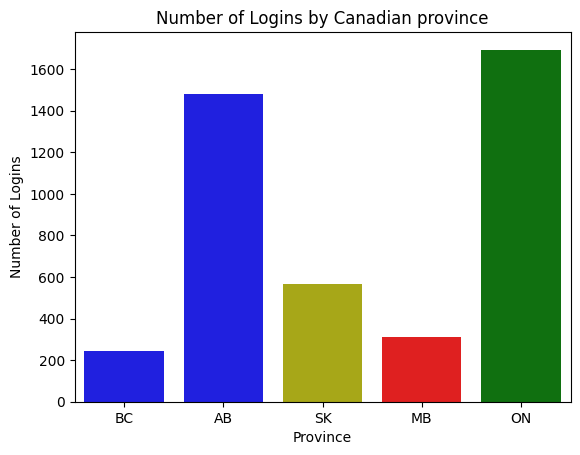

In [18]:
sns.barplot(x = 'state', y = 'count', data = reordered_canada, hue = 'state', palette = ['b','b','y','r','g'])
plt.xlabel('Province'),
plt.ylabel('Number of Logins')
plt.title('Number of Logins by Canadian province')
plt.show()